# Python Working with data

Data download:
https://figshare.com/ndownloader/articles/1314459/versions/10

Adapted from Data Carpentry's material: 
https://datacarpentry.org/python-ecology-lesson/02-starting-with-data.html

[Accompanying slides](https://docs.google.com/presentation/d/1ii8DKPjMA6krTikfbem7NLjA9XxeCf3e4rwD2N-yyKY/edit?usp=drive_link) 

In [1]:
# Import in a library to work with tabular data
import pandas as pd

In [3]:
# Load our data 
surveys_df = pd.read_csv("data/surveys.csv")
# About the data: https://datacarpentry.github.io/python-ecology-lesson/02-starting-with-data.html#our-data
# Note that 'pd' is used because we imported pandas as 'pd'

In [5]:
# Checking data types
type(surveys_df)
surveys_df.dtypes
surveys_df['sex'].dtype
surveys_df['record_id'].dtype

dtype('int64')

In [7]:
# Convert data type
surveys_df['record_id'] = surveys_df['record_id'].astype('float64')
surveys_df['record_id'].dtype

dtype('float64')

In [9]:
surveys_df['plot_id'].dtype
surveys_df.plot_id=surveys_df.plot_id.astype( "float")
surveys_df['plot_id'].dtype

dtype('float64')

In [11]:
# Remove rows that contain missing data
df_na = surveys_df.dropna()
df_na
df_na.to_csv('data/surveys_complete.csv', index= False)

### Determining object property and method responses

In [13]:
surveys_df.head() # The head() method displays the first several lines of a file.

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1.0,7,16,1977,2.0,NL,M,32.0,NaN
1,2.0,7,16,1977,3.0,NL,M,33.0,NaN
2,3.0,7,16,1977,2.0,DM,F,37.0,NaN
3,4.0,7,16,1977,7.0,DM,M,36.0,NaN
4,5.0,7,16,1977,3.0,DM,M,35.0,NaN


In [15]:
surveys_df.columns # Look at the column names

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [17]:
surveys_df.shape # Look at the number of rows and columns

(35549, 9)

In [19]:
surveys_df.count() # the number of values in each column

record_id          35549
month              35549
day                35549
year               35549
plot_id            35549
species_id         34786
sex                33038
hindfoot_length    31438
weight             32283
dtype: int64

## Statistics From Data

In [21]:
surveys_df.columns # Look at the column names
pd.unique(surveys_df['species_id']) # get unique values from a column

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

In [23]:
#Describe - to get all the stats
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64

In [ ]:
# Call each specifically
surveys_df['weight'].min() 
#or ...max() or ...mean() or ...std() or ...count()

### Group By

* Summarize by one or more variables
* Creates a new dataframe

In [ ]:
# Group data by sex
grouped_data = surveys_df.groupby('sex')
grouped_data

How many recorded individuals are female F and male M?

In [27]:
grouped_data.count()

NameError: name 'grouped_data' is not defined

In [29]:
# What happens when you group by two columns using the following syntax and then calculate mean values?
grouped_data2 = surveys_df.groupby(['plot_id', 'sex'])
grouped_data2.mean(numeric_only=True)


record_id     month        day         year  hindfoot_length  \
plot_id sex                                                                    
1.0     F    18390.384434  6.597877  15.338443  1990.933962        31.733911   
        M    17197.740639  6.121461  15.905936  1990.091324        34.302770   
2.0     F    17714.753608  6.426804  16.288660  1990.449485        30.161220   
        M    18085.458042  6.340035  15.440559  1990.756119        30.353760   
3.0     F    19888.783875  6.610302  15.993281  1992.013438        23.774044   
        M    20226.767857  6.277381  16.271429  1992.275000        23.833744   
4.0     F    17489.205275  6.447248  15.608945  1990.235092        33.249102   
        M    18493.841748  6.436893  16.303883  1991.000971        34.097959   
5.0     F    12280.793169  6.142315  15.722960  1986.485769        28.921844   
        M    12798.426621  6.194539  15.703072  1986.817406        29.694794   
6.0     F    19406.503392  6.640434  15.947083  1991.579376        26.981322   
        M    17849.574607  6.043194  15.856021  1990.556283        27.425591   
7.0     F    19069.668657  6.385075  15.313433  1991.441791        19.779553   
        M    19188.729642  6.719870  15.778502  1991.462541        20.536667   
8.0     F    18920.276190  6.644048  15.479762  1991.267857        32.187578   
        M    19452.109868  6.585961  15.427263  1991.686673        33.751059   
9.0     F    16217.497069  6.507620  15.309496  1989.303634        35.126092   
        M    18000.710159  6.369522  14.970120  1990.632470        34.175732   
10.0    F    16001.496454  5.588652  16.964539  1989.248227        18.641791   
        M    15708.704225  5.718310  16.739437  1989.007042        19.567164   
11.0    F    16994.962287  6.770073  15.954988  1989.836983        32.029299   
        M    16933.909621  6.379981  15.799806  1989.856171        32.078014   
12.0    F    17457.966981  6.509434  16.305660  1990.266981        30.975124   
        M    17592.327500  6.304167  16.367500  1990.400833        31.762489   
13.0    F    18033.100318  6.815287  15.847134  1990.619427        27.201014   
        M    16969.044700  6.485313  15.851852  1989.911877        27.893793   
14.0    F    17097.145275  6.519041  16.427362  1989.974612        32.973373   
        M    17891.948598  6.666355  16.336449  1990.587850        32.961802   
15.0    F    20602.449064  6.582121  15.787942  1992.523909        21.949891   
        M    18104.019560  6.193154  17.193154  1990.770171        21.803109   
16.0    F    19002.445946  6.369369  16.549550  1991.351351        23.144928   
        M    18434.714286  6.208791  16.402930  1990.926740        23.480916   
17.0    F    18234.322870  6.650224  15.892377  1990.785874        30.918536   
        M    18857.651472  6.569801  16.183286  1991.331434        32.227634   
18.0    F    17940.875497  6.698013  15.960265  1990.536424        26.690341   
        M    15106.718850  6.610224  16.797125  1988.551118        27.703072   
19.0    F    21848.216475  6.701149  15.226054  1993.417625        21.257937   
        M    19470.779690  6.533563  16.647160  1991.740103        21.071685   
20.0    F    17510.769231  6.743077  16.026154  1990.253846        27.069193   
        M    16076.192496  6.489396  16.375204  1989.243067        27.908451   
21.0    F    22452.636661  6.860884  16.307692  1993.878887        22.366554   
        M    20120.399113  6.671840  16.203991  1992.199557        21.736721   
22.0    F    18499.695976  6.651267  15.521610  1990.973174        34.108320   
        M    18015.365527  6.381872  16.682021  1990.650817        33.359746   
23.0    F    15863.193939  6.860606  16.036364  1989.024242        20.051948   
        M    17091.338164  6.391304  16.077295  1989.961353        19.850000   
24.0    F    13702.224280  6.596708  16.393004  1987.485597        26.993377   
        M    15208.136082  6.360825  16.971134  1988.641237        25.786996   

               

In [33]:
by_site=surveys_df.groupby("plot_id")

Summarize weight values for each site (plot_id) in your data. 

HINT: you can use the following syntax to only create summary statistics for one column in your data: by_site['weight'].describe()


In [37]:
by_site['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
plot_id,,,,,,,,
1.0,1903.0,51.822911,38.176670,4.0,30.0,44.0,53.0,231.0
2.0,2074.0,52.251688,46.503602,5.0,24.0,41.0,50.0,278.0
3.0,1710.0,32.654386,35.641630,4.0,14.0,23.0,36.0,250.0
4.0,1866.0,47.928189,32.886598,4.0,30.0,43.0,50.0,200.0
5.0,1092.0,40.947802,34.086616,5.0,21.0,37.0,48.0,248.0
6.0,1463.0,36.738893,30.648310,5.0,18.0,30.0,45.0,243.0
7.0,638.0,20.663009,21.315325,4.0,11.0,17.0,23.0,235.0
8.0,1781.0,47.758001,33.192194,5.0,26.0,44.0,51.0,178.0
9.0,1811.0,51.432358,33.724726,6.0,36.0,45.0,50.0,275.0


### Creating Summary Counts in Pandas

In [39]:
# Count the number of samples by species
species_counts = surveys_df.groupby( 'species_id')['record_id'].count()
species_counts


species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64

In [41]:
# also count just the rows that have the species “DO”
surveys_df.groupby('species_id')['record_id'].count()['DO']

3027

### Basic Plots with Pandas

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='plot_id'>

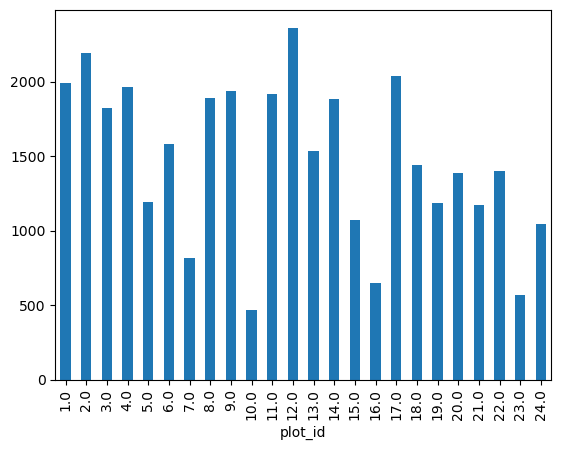

In [43]:
# Look at how many animals were captured in each site
total_count = surveys_df.groupby('plot_id')['record_id'].nunique()

# Let's plot it!
total_count.plot(kind='bar')

Exercise: Plotting with Pandas
1. Create a plot of average weight across all species per site.
2. Create a plot of total males versus total females for the entire dataset.

<Axes: xlabel='plot_id'>

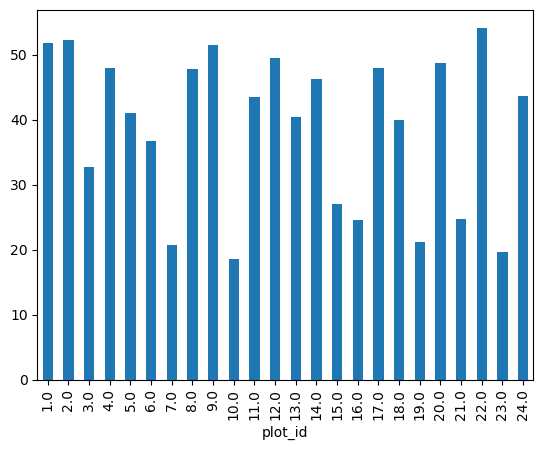

In [45]:
surveys_df.groupby("plot_id")["weight"].mean().plot(kind="bar")

<Axes: xlabel='sex'>

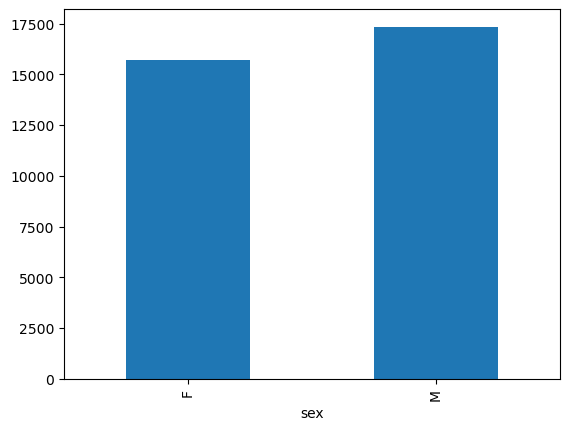

In [47]:
#2. Create a plot of total males versus total females for the entire dataset.

surveys_df.groupby("sex").count()["record_id"].plot(kind="bar")

# Indexing, Slicing and Subsetting

In [49]:
# Data Selection

# Method 1: select a 'subset' of the data using the column name
surveys_df['species_id']

# Method 2: use the column name as an 'attribute'; gives the same output
surveys_df.species_id

0         NL
1         NL
2         DM
3         DM
4         DM
        ... 
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

In [51]:
# Create an object, surveys_species, that only contains the `species_id` column
surveys_species = surveys_df['species_id']


In [53]:
# Select the species and plot columns from the DataFrame
surveys_df[['species_id', 'plot_id']]

#  What happens when you flip the order?

,species_id,plot_id
0,NL,2.0
1,NL,3.0
2,DM,2.0
3,DM,7.0
4,DM,3.0
...,...,...
35544,AH,15.0
35545,AH,15.0
35546,RM,10.0
35547,DO,7.0


### Slicing Subsets of Rows

'[ ]' operator selects a set of rows and/or columns from a DataFrame

data[start:stop], start included, stops one step before end

In [55]:
# Select rows 0, 1, 2 (row 3 is not selected)
surveys_df[0:3]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1.0,7,16,1977,2.0,NL,M,32.0,NaN
1,2.0,7,16,1977,3.0,NL,M,33.0,NaN
2,3.0,7,16,1977,2.0,DM,F,37.0,NaN


In [57]:
# Select the first 5 rows (rows 0, 1, 2, 3, 4)
surveys_df[:5]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1.0,7,16,1977,2.0,NL,M,32.0,NaN
1,2.0,7,16,1977,3.0,NL,M,33.0,NaN
2,3.0,7,16,1977,2.0,DM,F,37.0,NaN
3,4.0,7,16,1977,7.0,DM,M,36.0,NaN
4,5.0,7,16,1977,3.0,DM,M,35.0,NaN


In [59]:
# Select the last element in the list
# (the slice starts at the last element, and ends at the end of the list)
surveys_df[-1:]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35548,35549.0,12,31,2002,5.0,NaN,NaN,NaN,NaN


NOTE: Dateframes require a range selection 
surveys_df[0] will not work, instead use surveys_df.loc[0]

### Copying Objects vs Referencing Objects


In [61]:
# Using the 'copy() method
true_copy_surveys_df = surveys_df.copy()
# Using the '=' operator
ref_surveys_df = surveys_df
# Assign the value `0` to the first three rows of data in the DataFrame
ref_surveys_df[0:3] = 0
# ref_surveys_df was created using the '=' operator
ref_surveys_df.head()
# surveys_df is the original dataframe
surveys_df.head()
# Reset surveys_df
surveys_df = pd.read_csv("data/surveys.csv")

### Slicing Subsets of Rows and Columns

'loc' is primarily *label* based indexing 

Integers may be used but they are interpreted as a label

#data.loc[list (or range),[column ids] (or ‘:’ for all cols)]



In [63]:
# Select all columns for rows of index values 0 and 10
surveys_df.loc[[0, 10], :]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
10,11,7,16,1977,5,DS,F,53.0,NaN


iloc is primarily *integer* based indexing

data.iloc[row slicing, column slicing]


In [65]:
# Return the first 3 rows and columns 2-5
surveys_df.iloc[0:3, 1:4]

,month,day,year
0,7,16,1977
1,7,16,1977
2,7,16,1977


## Exercise: Ranges Experimentation
What happens when you execute:

In [ ]:
# surveys_df[0:1]
# surveys_df[:4]
# surveys_df[:-1]

# surveys_df.iloc[0:4, 1:4]
#surveys_df.loc[0:4, 1:4]


### Subsetting Data using Criteria

In [67]:
#select all rows that have a year value of 2002
surveys_df[surveys_df.year == 2002]

#select all rows that do not have a year value of 2002
surveys_df[surveys_df.year != 2002]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
33315,33316,12,16,2001,11,NaN,NaN,NaN,NaN
33316,33317,12,16,2001,13,NaN,NaN,NaN,NaN
33317,33318,12,16,2001,14,NaN,NaN,NaN,NaN
33318,33319,12,16,2001,15,NaN,NaN,NaN,NaN


In [69]:
# using and '&'
surveys_df[(surveys_df.year >= 1980) & (surveys_df.year <= 1985)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
2270,2271,1,15,1980,8,DO,M,35.0,53.0
2271,2272,1,15,1980,11,PF,F,16.0,10.0
2272,2273,1,15,1980,18,DM,F,34.0,33.0
2273,2274,1,15,1980,11,DM,M,38.0,37.0
2274,2275,1,15,1980,8,DO,F,33.0,29.0
...,...,...,...,...,...,...,...,...,...
11222,11223,12,8,1985,4,DM,M,36.0,40.0
11223,11224,12,8,1985,11,DM,M,37.0,49.0
11224,11225,12,8,1985,7,PE,M,20.0,18.0
11225,11226,12,8,1985,1,DM,M,38.0,47.0


In [71]:
# use the isin command in Python to query a DataFrame based upon a list of values
surveys_df[surveys_df['species_id'].isin(['NL'])]
#'~' symbol in Python can be used to return the OPPOSITE of the selection 
# e.g surveys_df[~surveys_df['species_id'].isin(['NL'])]
# Note '|' used for or

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
21,22,7,17,1977,15,NL,F,31.0,NaN
37,38,7,17,1977,17,NL,M,33.0,NaN
71,72,8,19,1977,2,NL,M,31.0,NaN
...,...,...,...,...,...,...,...,...,...
35403,35404,12,29,2002,2,NL,F,30.0,NaN
35414,35415,12,29,2002,12,NL,F,33.0,200.0
35434,35435,12,29,2002,18,NL,F,31.0,150.0
35458,35459,12,29,2002,20,NL,F,29.0,148.0


Exercise: Queries
1. Select a subset of rows in the surveys_df DataFrame that contain data from the year 1999 and that contain weight values less than or equal to 8. How many rows did you end up with?
1. Create a query that finds all rows with a weight value > or equal to 0.
1. Use the isin method to find all plots that contain 'NL' and 'DM'  species in the “surveys” DataFrame. How many records contain these values?
1. Write a query that selects all rows where 'sex' is NOT equal to ‘M’ or ‘F’ in the “surveys” data.
Hint: The ~ symbol in Python can be used to return the OPPOSITE of the selection that you specify in Python. It is equivalent to is not in. 



### Masks to identify a specific condition
Masks 
* Used to locate a subset of values 
* Can either exist or not
* For example, NaN, or “Not a Number” values
* Creates an output object with same shape as the original object, 
but with a True or False value for each index location.

Use: pd.isnull(your_dataframe_name)


In [ ]:
# To select just the rows with NaN values, we can use the 'any()' method
surveys_df[pd.isnull(surveys_df).any(axis=1)]
# Note axis=1 refers to columns, using axis of 0 with dataframes wouldn't make sense

In [ ]:
# To select the rows which have null values in a specific column
empty_weights = surveys_df[pd.isnull(surveys_df['weight'])]

### Exercise
1. Create a new DataFrame that only contains observations with sex values that are not female or male. 
    * Assign each sex value in the new DataFrame to the new value of ‘x’. 



1. Create a new DataFrame that contains only observations that are of sex male or female and where weight values are greater than 0. 
